In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

source_file = 'donors_data.csv'

# read the CSV file using Pandas, and display the top 5 rows prior to any data manipulation
donor_data = pd.read_csv(source_file)
print('\nExploratory information about the data')
donor_data.head()


c:\program files (x86)\python 3.7.0\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")



Exploratory information about the data


Row Id  Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  zipconvert_5  \
0       1       17             0             1             0             0   
1       2       25             1             0             0             0   
2       3       29             0             0             0             1   
3       4       38             0             0             0             1   
4       5       40             0             1             0             0   

   homeowner dummy  NUMCHLD  INCOME  gender dummy    ...     IC15  NUMPROM  \
0                1        1       5             1    ...        1       74   
1                1        1       1             0    ...        4       46   
2                0        2       5             1    ...       13       32   
3                1        1       3             0    ...        4       94   
4                1        1       4             0    ...        7       20   

   RAMNTALL  MAXRAMNT  LASTGIFT  totalmonths  TIMELAG   AVGGIFT  TARGET_B  \
0     102.0       6.0       5.0           29        3  4.857143         1   
1      94.0      12.0      12.0           34        6  9.400000         1   
2      30.0      10.0       5.0           29        7  4.285714         1   
3     177.0      10.0       8.0           30        3  7.080000         0   
4      23.0      11.0      11.0           30        6  7.666667         0   

   TARGET_D  
0       5.0  
1      10.0  
2       5.0  
3       0.0  
4       0.0  

[5 rows x 24 columns]

In [2]:
# Get a description of the source data
print('\nDescription')
donor_data.describe()


Description


Row Id       Row Id.  zipconvert_2  zipconvert_3  zipconvert_4  \
count  3120.000000   3120.000000   3120.000000   3120.000000   3120.000000   
mean   1560.500000  11615.770833      0.214423      0.185256      0.214423   
std     900.810746   6698.678131      0.410487      0.388568      0.410487   
min       1.000000     17.000000      0.000000      0.000000      0.000000   
25%     780.750000   5820.750000      0.000000      0.000000      0.000000   
50%    1560.500000  11735.500000      0.000000      0.000000      0.000000   
75%    2340.250000  17435.750000      0.000000      0.000000      0.000000   
max    3120.000000  23293.000000      1.000000      1.000000      1.000000   

       zipconvert_5  homeowner dummy      NUMCHLD       INCOME  gender dummy  \
count   3120.000000      3120.000000  3120.000000  3120.000000   3120.000000   
mean       0.384615         0.770192     1.069231     3.893910      0.609295   
std        0.486582         0.420777     0.347688     1.636186      0.487987   
min        0.000000         0.000000     1.000000     1.000000      0.000000   
25%        0.000000         1.000000     1.000000     3.000000      0.000000   
50%        0.000000         1.000000     1.000000     4.000000      1.000000   
75%        1.000000         1.000000     1.000000     5.000000      1.000000   
max        1.000000         1.000000     5.000000     7.000000      1.000000   

          ...              IC15      NUMPROM     RAMNTALL     MAXRAMNT  \
count     ...       3120.000000  3120.000000  3120.000000  3120.000000   
mean      ...         14.702885    49.089423   110.399875    16.651397   
std       ...         12.079882    22.717130   147.299933    22.223521   
min       ...          0.000000    11.000000    15.000000     5.000000   
25%       ...          5.000000    29.000000    45.000000    10.000000   
50%       ...         12.000000    48.000000    81.000000    15.000000   
75%       ...         21.000000    65.000000   134.625000    20.000000   
max       ...         90.000000   157.000000  5674.900000  1000.000000   

          LASTGIFT  totalmonths      TIMELAG      AVGGIFT    TARGET_B  \
count  3120.000000  3120.000000  3120.000000  3120.000000  3120.00000   
mean     13.522917    31.136859     6.861859    10.690713     0.50000   
std      10.581439     4.132952     5.561209     7.443980     0.50008   
min       0.000000    17.000000     0.000000     2.138889     0.00000   
25%       7.000000    29.000000     3.000000     6.356092     0.00000   
50%      10.000000    31.000000     5.000000     9.000000     0.50000   
75%      16.000000    34.000000     9.000000    12.811652     1.00000   
max     219.000000    37.000000    77.000000   122.166667     1.00000   

          TARGET_D  
count  3120.000000  
mean      6.499612  
std      10.597849  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%      10.000000  
max     200.000000  

[8 rows x 24 columns]

In [3]:
# remove the dummy suffixes from the columns
donor_data = donor_data.rename(columns=lambda col: col.replace(' dummy', ''))

# append a new column to the end of the data frame that is based on the highest index value
# in the zip_convert columns, which are binary values set to 0 or 1
donor_data['region'] = donor_data.loc[:, 'zipconvert_2':'zipconvert_5'].idxmax(axis=1)

# replace the zipconvert_ value with blanks using a regular expression
donor_data = donor_data.replace({'region': 'zipconvert_'}, {'region':''}, regex=True)

# drop extraneous columns
donor_data.drop(['Row Id', 'Row Id.', 'zipconvert_2', 'zipconvert_3', 'zipconvert_4', 'zipconvert_5'],  axis=1, inplace=True)

# now what does the dataframe look like?
donor_data.head()

homeowner  NUMCHLD  INCOME  gender  WEALTH    HV  Icmed  Icavg  IC15  \
0          1        1       5       1       9  1399    637    703     1   
1          1        1       1       0       7   698    422    463     4   
2          0        2       5       1       8   828    358    376    13   
3          1        1       3       0       4  1471    484    546     4   
4          1        1       4       0       8   547    386    432     7   

   NUMPROM  RAMNTALL  MAXRAMNT  LASTGIFT  totalmonths  TIMELAG   AVGGIFT  \
0       74     102.0       6.0       5.0           29        3  4.857143   
1       46      94.0      12.0      12.0           34        6  9.400000   
2       32      30.0      10.0       5.0           29        7  4.285714   
3       94     177.0      10.0       8.0           30        3  7.080000   
4       20      23.0      11.0      11.0           30        6  7.666667   

   TARGET_B  TARGET_D region  
0         1       5.0      3  
1         1      10.0      2  
2         1       5.0      5  
3         0       0.0      5  
4         0       0.0      3

In [4]:
# check to see if there is any null data
print('\nChecking for NULL data')
donor_data.isnull().values.any()


Checking for NULL data


False

In [5]:
#let's do some comparisons

# what is the average value of lifetime donations by gender?
calc = round(donor_data.groupby(['gender'])["RAMNTALL"].mean(), 2)
print('\nAverage lifetime donations by gender')
print(calc)

# what is the average gift amount by region?
calc = round(donor_data.groupby(['region'])["AVGGIFT"].mean(), 2)
print('\nAverage gift amount by region')
print(calc)

# what is the average gift amount by region and income?
calc = round(donor_data.groupby(['region', 'INCOME'] )["AVGGIFT"].mean(), 2) 
print('\nAverage gift amount by region and median household income')
print(calc)

# what is the average gift amount by income?
calc = round(donor_data.groupby(['INCOME'] )["AVGGIFT"].mean(), 2)
print('\nAverage gift amount by median household income')
print(calc)



Average lifetime donations by gender
gender
0    103.95
1    114.54
Name: RAMNTALL, dtype: float64

Average gift amount by region
region
2    10.59
3     9.73
4    10.30
5    11.43
Name: AVGGIFT, dtype: float64

Average gift amount by region and median household income
region  INCOME
2       1          8.71
        2          9.76
        3         10.29
        4         10.22
        5         11.56
        6         11.30
        7         13.85
3       1          8.43
        2          9.05
        3          9.48
        4          9.14
        5         10.80
        6         11.41
        7         13.52
4       1          9.98
        2          9.73
        3          9.22
        4         10.65
        5          9.65
        6         12.21
        7         11.46
5       1         10.55
        2         10.60
        3         10.20
        4         11.21
        5         11.44
        6         12.71
        7         13.94
Name: AVGGIFT, dtype: float64

Average gif

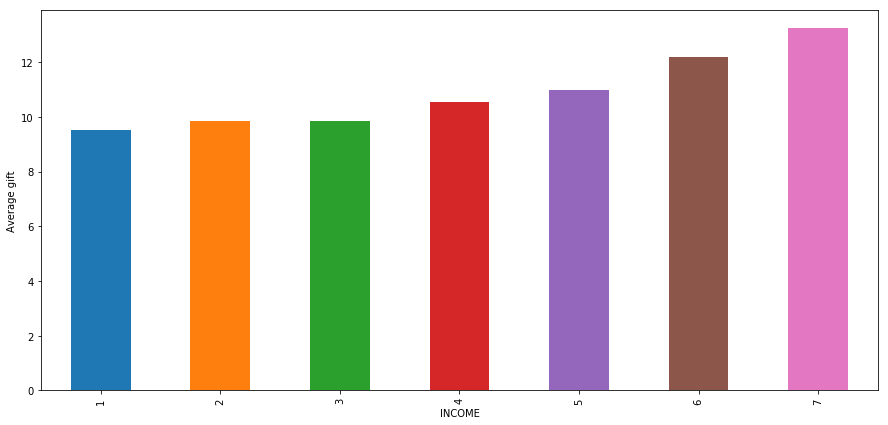

In [6]:
# plot the average donation amount by income
# this is a work in progress
calc = donor_data.groupby(['INCOME'] )['AVGGIFT'].mean()
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('Income')
ax.set_ylabel('Average gift')

calc.plot(ax = ax, kind='bar')


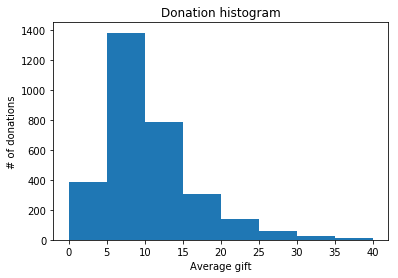

In [7]:
# what is the distribution of average donations (histogram)?
plt.hist(donor_data.AVGGIFT[donor_data.AVGGIFT < 40], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])
plt.title('Donation histogram')
plt.xlabel('Average gift')
plt.ylabel('# of donations')
plt.show()

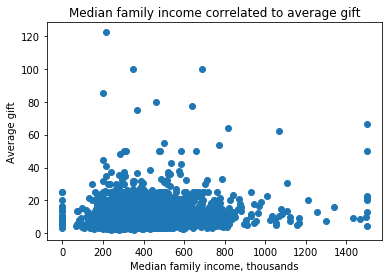

In [8]:
# Is income correlated to average donation?
plt.scatter(donor_data.Icmed, donor_data.AVGGIFT)
plt.title('Median family income correlated to average gift')
plt.xlabel('Median family income, thousands')
plt.ylabel('Average gift')
plt.show()


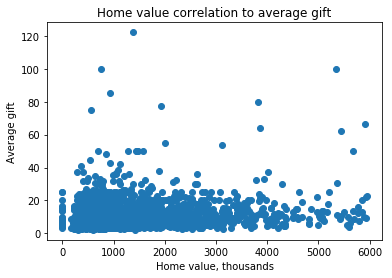

In [9]:
# is home value correlated to average donation?
plt.scatter(donor_data.HV, donor_data.AVGGIFT)
plt.title('Home value correlation to average gift')
plt.xlabel('Home value, thousands')
plt.ylabel('Average gift')
plt.show()

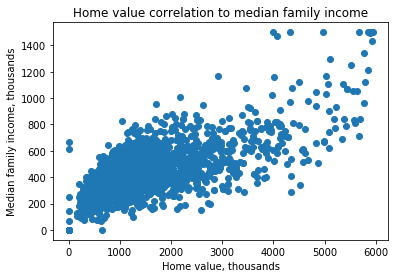

In [10]:
# hmmm nothing seems correlated. Is home value correlated to median income?
plt.scatter(donor_data.HV, donor_data.Icmed)
plt.title('Home value correlation to median family income')
plt.xlabel('Home value, thousands')
plt.ylabel('Median family income, thousands')
plt.show()